In [0]:
# Import iris dataset
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
#150 rows (samples) 4 columns (features: Height & Width of Pedals & Sepals) 
print(iris.data.shape)

(150, 4)


In [0]:
# Print out raw dataset
iris

In [0]:
#import Pandas
import pandas as pd
import numpy as np

#create dataframe with Pandas
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [24]:
#display Dataframe

df

## Print just the last 5 rows 
# df.tail()

## prints the first 5 rows
# df.head()

## Change settings to display all of our rows. 
# pd.options.display.max_rows = 200

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


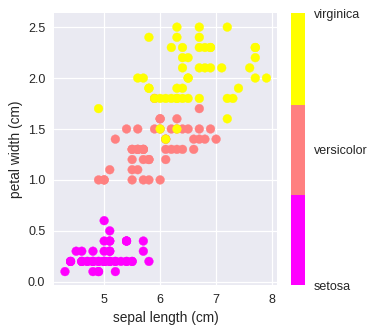

In [19]:
# We probably wont coner everything happening in the cell due to time
# we'll comver more about matplotlib and Pandas in an intro to Data Science workshop


%matplotlib inline
import matplotlib.pyplot as plt

# choose x & y index values. 
# Remember our list looks like this
# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)']

# 0 = sepal length (cm)
# 3 = petal width (cm)
x_index = 0
y_index = 3

# this formatter will label the colorbar with the correct target names
# Look up lambda functions in python, they're neat!
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


# figsize: width, height Inches
# dpi: Dots per inch
plt.figure( figsize=(4, 4), dpi=90)

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('spring', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [20]:
from sklearn import neighbors

x = iris.data
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=4)

#pass features and labels into model
knn.fit(x, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# 0 = setosa' 1 = 'versicolor' 2 = 'virginica']
# Data: sepal length, sepal width, petal length, petal width

# Comment / Uncoomment different flowers below to see the prediction. 
test_flower = [3, 5, 4, 2]
#test_flower = [5.1, 3.5, 1.4, .2]
# test_flower = [6, 20, -1, 8]

result = knn.predict([test_flower])

print(result)

knn.predict_proba([test_flower])

[1]


array([[0.  , 0.75, 0.25]])

In [16]:
pred = knn.predict_proba([test_flower])
preddf = pd.DataFrame(pred, columns=iris.target_names)
preddf

,setosa,versicolor,virginica
0,0.0,0.75,0.25


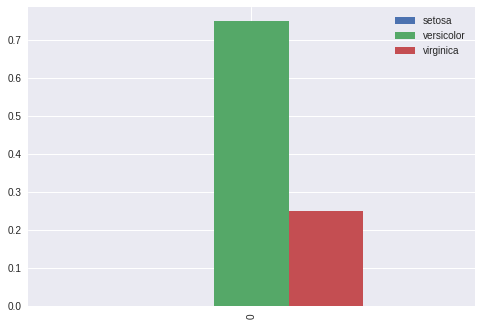

In [17]:
# Lets make it a chart so we can read even more easily!
preddf.plot(kind='bar');

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=21, 
                                                    stratify=y)


knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print("Test Predictions: \n {}".format(y_pred))



# Print accuracy
knn.score(x_test, y_test)

Test Predictions: 
 [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


0.9777777777777777

Back to Github repo: https://github.com/sagecodes/intro-machine-learning